# Reformat Data

In [1]:
import json
import re

with open('data.json', 'r') as openfile:
    json_object = json.load(openfile)

for a in json_object: 
  st = re.sub(r"[^0-9.%]"," ",a['GiaTien']).split()
  if len(st)==0: 
    a['GiaTien'] = None
    a.update({"GiaGoc": None})
    a.update({"GiamGia": None})
    continue
  price = int(st[0].replace(".",""))
  if len(st)>1: 
    origin = st[1].replace(".","")
  else:
    origin = st[0].replace(".","")
  origin = int(origin)
  if origin < price:
    tg = origin
    origin = price
    price = origin
  a['GiaTien'] = price
  a.update({"GiaGoc": origin})
  discount = str(100-price*100//origin) +'%'
  a.update({"GiamGia": discount})
  tg = a['ChuyenMuc']
  a['ChuyenMuc'] = tg[0]
  if len(tg)==3:
    a.update({"LoaiSanPham": tg[1]})
    a.update({"Hang": tg[2]})
  elif len(tg) == 2:
    a.update({"LoaiSanPham": tg[0]})
    a.update({"Hang": tg[1]})
  else:
    a.update({"LoaiSanPham": tg[0]})
    a.update({"Hang": "Các loại " + tg[0].lower() + " khác"})

with open("sample.json", "w") as outfile:
    json.dump(json_object, outfile)

 # Data Understanding And Visualization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     
import matplotlib.ticker as ticker
import seaborn as sns

Đọc dữ liệu, loại bỏ dữ liệu thừa và thông tin các trường:

In [3]:
df = pd.read_json('/content/sample.json')
df.drop('STT', axis=1, inplace=True)
df = df.dropna(subset=['GiaTien', 'GiaGoc'])
np.where(pd.isnull(df))
df['GiaTien'] = df['GiaTien'].astype(np.int64)
df['GiaGoc'] = df['GiaGoc'].astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6064 entries, 0 to 6303
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   URL             6064 non-null   object
 1   TenSanPham      6064 non-null   object
 2   GiaTien         6064 non-null   int64 
 3   ChuyenMuc       6064 non-null   object
 4   ChitietSanPham  6064 non-null   object
 5   Nhanxet         6064 non-null   object
 6   GiaGoc          6064 non-null   int64 
 7   GiamGia         6064 non-null   object
 8   LoaiSanPham     6064 non-null   object
 9   Hang            6064 non-null   object
dtypes: int64(2), object(8)
memory usage: 521.1+ KB


Lấy 5 sản phẩm bất kỳ:

In [4]:
df.sample(5)

,URL,TenSanPham,GiaTien,ChuyenMuc,ChitietSanPham,Nhanxet,GiaGoc,GiamGia,LoaiSanPham,Hang
2480,https://www.dienmayxanh.com/binh-dung-nuoc/nhu...,Bình đựng nước nhựa 800 ml Delites PC-002,70000,Đồ dùng,{},"[{'User': 'Lê Hà', 'Comment': 'Mới nhận bì...",70000,0%,Bình đựng nước,Bình đựng nước Delites
3412,https://www.dienmayxanh.com/may-vat-cam/tu-don...,Máy vắt cam BEAR CZJ-A04B1,424000,Gia dụng,"{'Chức năng': None, 'Công suất': '30 W, Dung t...",[],499000,16%,Máy vắt cam,Máy vắt cam Bear
1990,https://www.dienmayxanh.com/xay-tieu-toi-ot/xa...,Xay tiêu nhựa CMH,27000,Phụ kiện nhà bếp,{},"[{'User': 'Sơn', 'Comment': 'Loại này ở sài gò...",54000,50%,"Xay tiêu, tỏi, ớt","Xay tiêu, tỏi, ớt Chung Mộc Hùng"
947,https://www.dienmayxanh.com/tai-nghe/tai-nghe-...,Tai nghe Bluetooth True Wireless Sony WF-1000XM3,4790000,Tai nghe,{'Thời gian tai nghe:': 'Dùng 8 giờ - Sạc 1.5 ...,"[{'User': 'Thành Phúc', 'Comment': 'Cho mình h...",4790000,0%,Bluetooth,Bluetooth Sony
6111,https://www.dienmayxanh.com/may-khoan/may-khoa...,Máy khoan điện Bosch GBM 320 320W,612000,"Máy khoan, vặn vít","{'Loại sản phẩm': None, 'Nguồn cấp điện': 'Dùn...","[{'User': 'Bin', 'Comment': 'Xin hỏi: máy này ...",720000,15%,Khoan thường (Khoan xoay),Khoan thường (Khoan xoay) Bosch


## Basic Analysis

Khoảng giá của sản phẩm:

In [5]:
print('Giá sản phẩm trung bình: ', round(df['GiaTien'].mean(),2))
print('Giá sản phẩm cao nhất: ',df['GiaTien'].max())
print('Giá sản phẩm thấp nhất: ', df['GiaTien'].min())

Giá sản phẩm trung bình:  7502550.96
Giá sản phẩm cao nhất:  3499000000
Giá sản phẩm thấp nhất:  3000


Số lượng sản phẩm theo chuyên mục

In [6]:
df['ChuyenMuc'].value_counts()

Gia dụng                  1101
Đồ dùng                    739
Tivi                       249
Phụ kiện                   228
Tai nghe                   206
Bếp điện                   203
Cáp sạc, chuyển đổi        202
Xe đạp                     183
Laptop                     183
Tủ lạnh                    177
Máy giặt                   168
Loa                        167
Điện thoại                 159
Chén Bát                   150
Phụ Kiện Xe Đạp            136
Thiết bị làm bánh          135
Thiết bị lọc nước          130
Thiết bị làm đẹp           117
Máy nước nóng              112
Dụng cụ sửa chữa           105
Phụ kiện nhà bếp            87
Quạt                        86
Đồ đựng thực phẩm           86
Bình, ly giữ nhiệt          65
Pc, máy in                  55
Máy lạnh                    55
Lò nướng                    54
Phụ kiện máy lọc nước       51
Bình, Ly                    51
Máy ép trái cây             48
Đồng hồ thông minh          47
Vệ sinh nhà cửa             43
Muỗng, đ

Lấy 5 sản phẩm Laptop thuộc hãng Dell bất kì:

In [43]:
df[df['ChuyenMuc']=='Laptop'][df[df['ChuyenMuc']=='Laptop']['Hang']=='Laptop Dell'].sample(5)

,URL,TenSanPham,GiaTien,ChuyenMuc,ChitietSanPham,Nhanxet,GiaGoc,GiamGia,LoaiSanPham,Hang
1442,https://www.dienmayxanh.com/laptop/dell-vostro...,Laptop Dell Vostro 3400 i3 1115G4/8GB/256GB/Of...,15690000,Laptop,"{'CPU:': 'i3', 'RAM:': '8 GB', 'Ổ cứng:': '256...","[{'User': 'Thảo', 'Comment': 'Cho mk hỏi ở Hà ...",15690000,0%,Laptop,Laptop Dell
1449,https://www.dienmayxanh.com/laptop/dell-inspir...,Laptop Dell Inspiron 7400 i5 1135G7/16GB/512GB...,30490000,Laptop,"{'CPU:': 'i5', 'RAM:': '16 GB', 'Ổ cứng:': '51...","[{'User': 'Võ Văn Thơ', 'Comment': 'Có hàng ở ...",30490000,0%,Laptop,Laptop Dell
1457,https://www.dienmayxanh.com/laptop/dell-gaming...,Laptop Dell Gaming G3 15 i7 10750H/16GB/512GB/...,29990000,Laptop,"{'CPU:': 'i7', 'RAM:': '16 GB', 'Ổ cứng:': '51...","[{'User': 'Trần Văn Vinh', 'Comment': 'Vậy tại...",29990000,0%,Laptop,Laptop Dell
1447,https://www.dienmayxanh.com/laptop/dell-inspir...,Laptop Dell Inspiron 3501 i5 1135G7/8GB/512GB/...,22490000,Laptop,"{'CPU:': 'i5', 'RAM:': '8 GB', 'Ổ cứng:': 'Hỗ ...","[{'User': 'Bạch', 'Comment': 'Cho mình xin lin...",22490000,0%,Laptop,Laptop Dell
1430,https://www.dienmayxanh.com/laptop/dell-inspir...,Laptop Dell Inspiron 14 5415 R5 5500U/8GB/256G...,19590000,Laptop,"{'CPU:': 'Ryzen 5', 'RAM:': '8 GB', 'Ổ cứng:':...","[{'User': 'Lê Lộc', 'Comment': 'Laptop Dell In...",19590000,0%,Laptop,Laptop Dell


Nhóm sản phẩm theo giá tiền với bước giá 10 triệu

In [7]:
gr = df.groupby(pd.cut(df['GiaTien'], np.arange(0, df['GiaTien'].max()+1, 10000000)))
gr[[ 'TenSanPham']].count().head(15)

,TenSanPham
GiaTien,
"(0, 10000000]",4928
"(10000000, 20000000]",614
"(20000000, 30000000]",264
"(30000000, 40000000]",112
"(40000000, 50000000]",45
"(50000000, 60000000]",35
"(60000000, 70000000]",22
"(70000000, 80000000]",10
"(80000000, 90000000]",5


## DATA VISUALIZATION

Thống kê Laptop theo thương hiệu:

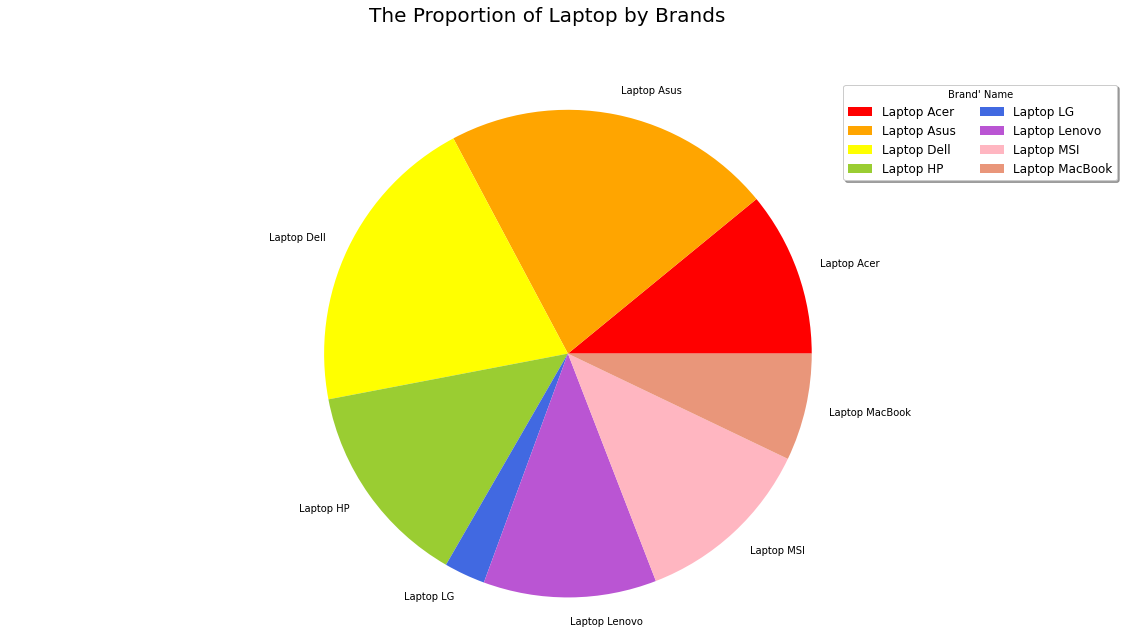

In [8]:
gr_source = df.groupby(df[df['ChuyenMuc']=='Laptop']['Hang'])
gr_source.size()
list_source = gr_source.size().index
rate_source = gr_source.size() / 183 * 100
plt.rcParams['figure.figsize'] = (20,10)
plt.pie(rate_source , labels=list_source, colors=["#ff0000",  "#ffa500", "#ffff00", "#9acd32", "#4169e1", "#ba55d3", "#ffb6c1", "#e9967a"])
plt.axis('equal')
plt.suptitle('The Proportion of Laptop by Brands',fontsize =20)
plt.legend(title = "Brand' Name",fontsize = 12, shadow = True,ncol =2)
plt.show()

Top 10 mức giảm giá phổ biến:

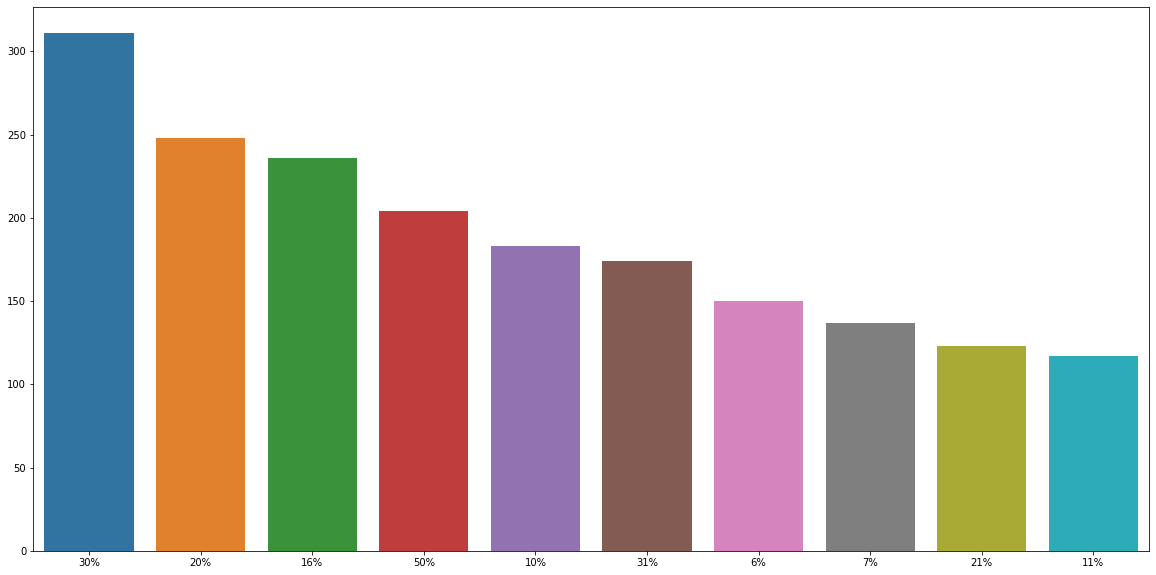

In [14]:
plt.subplots(figsize=(20,10))
sns.barplot(x=df['GiamGia'].value_counts()[1:11].index,y=df['GiamGia'].value_counts()[1:11].values)
plt.show()

  Sự tương quan giữa giá trị trung bình và giá trị cao nhất của từng thương hiệu Tivi

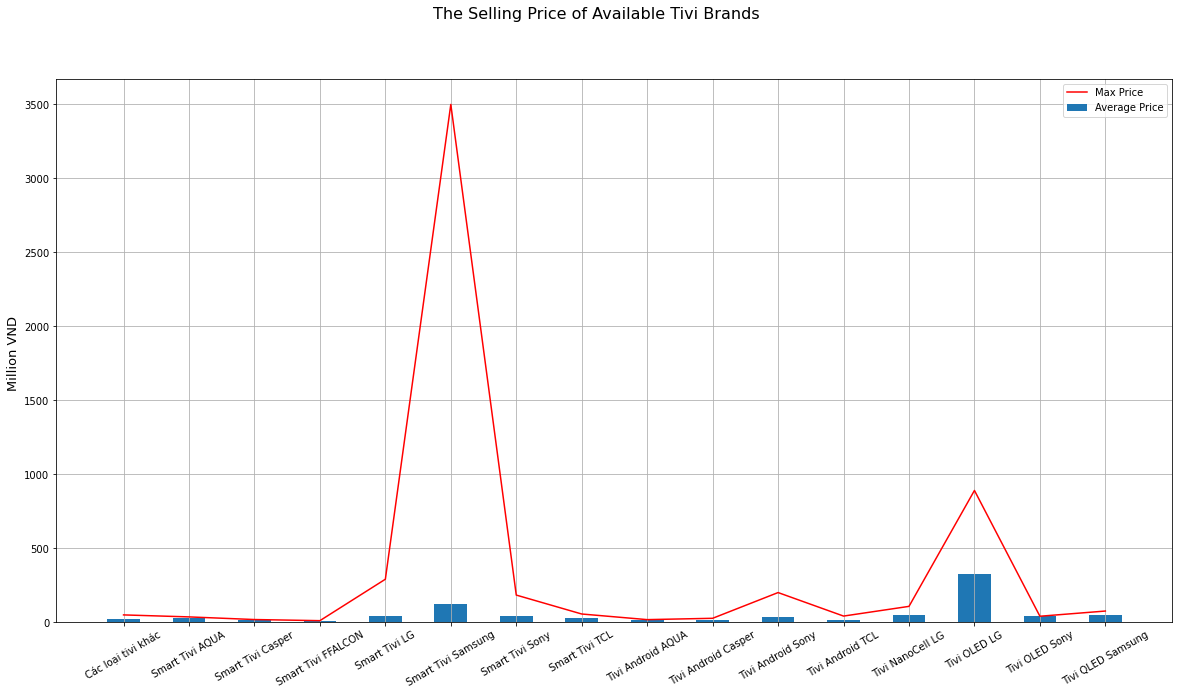

In [51]:
group_cate = df.groupby('ChuyenMuc')
group_brand = group_cate.get_group('Tivi').groupby('Hang')
computer_mean = group_brand.mean()
computer_max
computer_max = group_brand['GiaTien'].max()
computer_max
plt.rcParams['figure.figsize'] = (20,10)
x1 = computer_mean.index
y1 = computer_mean['GiaTien'] / 10**6
y2 = computer_max / 10**6

plt.xticks(rotation=30)
plt.grid()
plt.ylabel('Million VND ',fontsize =13)
plt.suptitle('The Selling Price of Available Tivi Brands',fontsize =16)

plt.plot(x1, y2, label='Max Price',color ='red')
plt.bar(x1,y1,width=0.5,label = 'Average Price')

plt.legend()
plt.show()